In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mf.manfit_ours import manfit_ours

from time import time

In [2]:
NumTrials = 1

D = 3
dim = 2
tau = 1
sigma = 0.1

In [3]:
np.random.seed(1)

NumSamples = 5000
NumIni = 1000

t1 = np.random.randn(3, NumSamples)
samples = t1 @ np.diag(1 / np.sqrt(np.sum(t1**2, axis=0))) + sigma * np.random.randn(3, NumSamples)

t = np.random.randn(3, 2 * NumIni)
data_ini = t @ np.diag(1 / np.sqrt(np.sum(t**2, axis=0))) + 2 * sigma / np.sqrt(D) * (2 * np.random.rand(3, 2 * NumIni) - 1)
proj_data_ini = data_ini * (tau / np.sqrt(np.sum(data_ini**2, axis=0)))
norm_n2 = np.sum((data_ini - proj_data_ini)**2, axis=0)
Index = np.argsort(norm_n2)[::-1]
data_ini = data_ini[:, Index[:NumIni]]

tic = time()
Mout = manfit_ours(samples.T, sigma, data_ini.T)
Mout = Mout.T
toc = time() - tic

proj_Mout = Mout * (tau / np.sqrt(np.sum(Mout**2, axis=0)))            

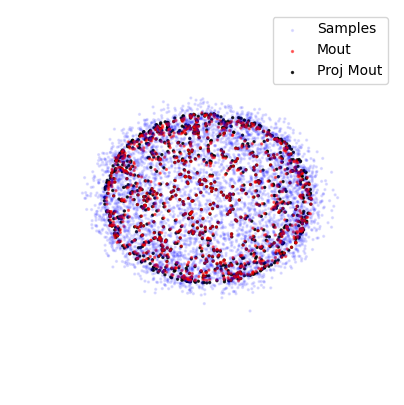

In [4]:
fig_width = 5
fig_height = 5

fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(samples[0, :], samples[1, :], samples[2, :], c='b', alpha=0.1, s=2, label='Samples')
ax.scatter(Mout[0, :], Mout[1, :], Mout[2, :], c='r', alpha=0.5, s=2, label='Mout')
ax.scatter(proj_Mout[0, :], proj_Mout[1, :], proj_Mout[2, :], c='k', alpha=0.8, s=2, label='Proj Mout')

ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])

ax.axis('off')
plt.legend()
plt.show()